In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from healpyHelper import HealpyHelper

In [2]:
hph = HealpyHelper(NSIDE=64)

In [3]:
#Read the needed catalogs.
#Read the full F-test and BIC AGN candidate catalogs. 
Fcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_F_test_AGN_full_photometry.fits")
Bcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_BIC_AGN_nb_le_6_full_photometry.fits")

In [4]:
#Read the wide survey catalog. 
wide = Table.read("Master_AGN_Catalog.downselected.wide.v1.1.fits")

In [5]:
#Limit the Fcat and Bcat to the regions with no sources in the wide survey.
h_wide = hph.get_h(wide['ra'], wide['dec'])
n_F = hph.get_n(Fcat['ra'], Fcat['dec'])
n_B = hph.get_n(Bcat['ra'], Bcat['dec'])
Fcat_nr = Fcat[(h_wide[n_F]==0) & (Fcat['mag_auto_r']>90.)]
Bcat_nr = Bcat[(h_wide[n_B]==0) & (Bcat['mag_auto_r']>90.)]

In [6]:
#Get the number of sources per healpix cel in the no r-band F-test sample
h_F_nr = hph.get_h(Fcat_nr['ra'], Fcat_nr['dec'])

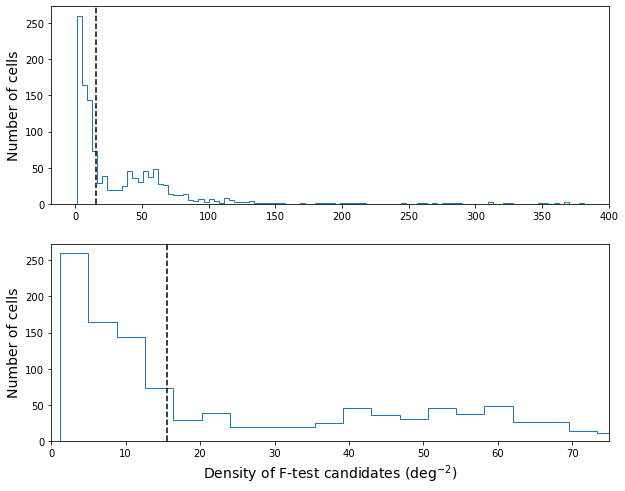

In [7]:
#Plot the distribution of healpix cell densities.
fig, axs = plt.subplots(2, figsize=(10,8))

median_F_nr_dens = np.median(h_F_nr[h_F_nr>0]/hph.area_per_pixel)

axs[0].hist(h_F_nr[h_F_nr>0]/hph.area_per_pixel, bins=100, histtype='step')
axs[0].set_ylim(axs[0].get_ylim())
axs[0].plot([median_F_nr_dens]*2, axs[0].get_ylim(), 'k--')
axs[0].set_ylabel('Number of cells', fontsize=14)

axs[1].hist(h_F_nr[h_F_nr>0]/hph.area_per_pixel, bins=100, histtype='step')
axs[1].set_xlim([0,75])
axs[1].set_ylim(axs[1].get_ylim())
axs[1].plot([median_F_nr_dens]*2, axs[1].get_ylim(), 'k--')
axs[1].set_ylabel('Number of cells', fontsize=14)
axs[1].set_xlabel(r'Density of F-test candidates (deg$^{-2}$)', fontsize=14)

plt.show()

## Definition

There seems to be a very clear distinction between regions that have less than 30 F-test candidates per sq. degree and regions that have more. Let's look at their distribution in the sky.

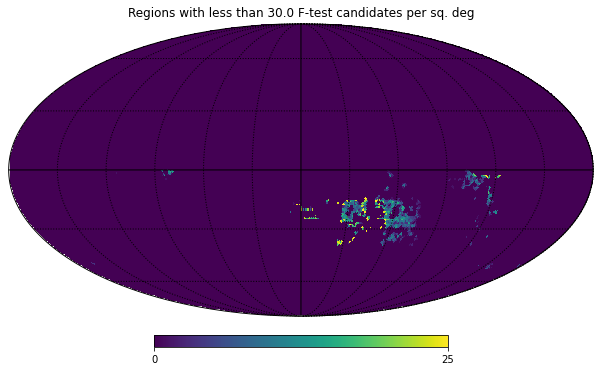

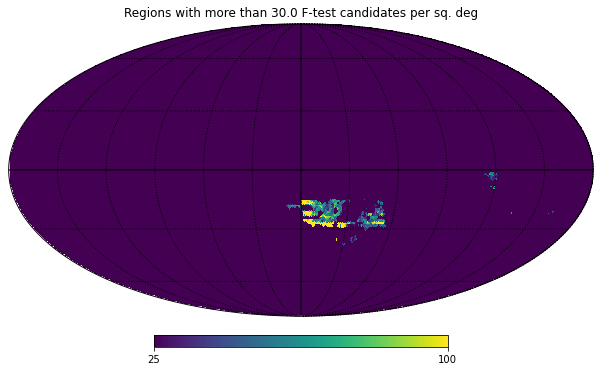

In [8]:
dens_sep = 30.
c_sep = np.round(dens_sep * hph.area_per_pixel, 0)
n_F_nr = hph.get_n(Fcat_nr['ra'], Fcat_nr['dec'])
cond = h_F_nr[n_F_nr]<c_sep
hph.plot_healpix(Fcat_nr['ra'][cond], Fcat_nr['dec'][cond], cmin=0, cmax=c_sep,
                title='Regions with less than {} F-test candidates per sq. deg'.format(dens_sep))

cond = h_F_nr[n_F_nr]>=c_sep
hph.plot_healpix(Fcat_nr['ra'][cond], Fcat_nr['dec'][cond], cmin=c_sep, cmax=100,
                title='Regions with more than {} F-test candidates per sq. deg'.format(dens_sep))



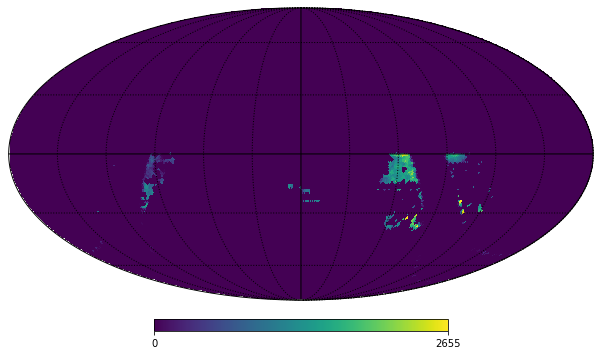

In [9]:
#Let's see where do we have BIC sources with no F-test sources. 
n_B_nr = hph.get_n(Bcat_nr['ra'], Bcat_nr['dec'])
cond = h_F_nr[n_B_nr]==0
hph.plot_healpix(Bcat_nr['ra'][cond], Bcat_nr['dec'][cond])